In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
titanic_df = pd.read_csv("titanic_data.csv")

In [9]:
print titanic_df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## How did sex and socioeconomic status affect your chance of survival on the Titanic? Were you more likely to survive if you had children on the boat?

### Gender

It is well known from folklore that women (and children) were prioritised for rescue. However, were you more likely to survive if you are woman, and were their other factors that affected your chance of survival?

#### Total male and females, and survival rates

Below are the total number of females and males on the Titanic.

In [29]:
titanic_sex = titanic_df.groupby("Sex")
sex_survival_sum = titanic_sex['Survived'].sum()
print titanic_sex.size()

Sex
female    314
male      577
dtype: int64


Below are the total number of surviving females and males, as well as the survival rates for sex.

In [30]:
print sex_survival_sum
print sex_survival_sum.divide(titanic_sex.size())

Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
dtype: float64


### Socioeconomic Factors

#### Fare as a measure of socioeconomic status

Without more data, we can make an estimate of the socioeconomic status of each passenger by looking at the fare they had paid for a ticket.

(array([ 562.,  170.,   67.,   39.,   15.,   16.,    2.,    0.,    9.,
           2.,    6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    3.]),
 array([   0.     ,   25.61646,   51.23292,   76.84938,  102.46584,
         128.0823 ,  153.69876,  179.31522,  204.93168,  230.54814,
         256.1646 ,  281.78106,  307.39752,  333.01398,  358.63044,
         384.2469 ,  409.86336,  435.47982,  461.09628,  486.71274,
         512.3292 ]),
 <a list of 20 Patch objects>)

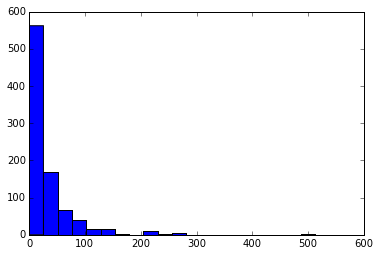

In [37]:
plt.hist(titanic_df['Fare'], bins = 20)

The Fare variable has a clear skewed distribution, with the median salary being under £14.50. The table below shows the mean fares for each group but grouped by the passenger class (1st, 2nd or 3rd class),followed by a histogram showing how the fares are distributed in each class.

In [55]:
titanic_class = titanic_df.groupby("Pclass")
print titanic_class['Fare'].mean()
print titanic_class['Fare'].count()

x = titanic_df.loc[titanic_df['Pclass'] == 1]['Fare']
y = titanic_df.loc[titanic_df['Pclass'] == 2]['Fare']
z = titanic_df.loc[titanic_df['Pclass'] == 3]['Fare']

print x

plt.hist(x.values())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64
1       71.2833
3       53.1000
6       51.8625
11      26.5500
23      35.5000
27     263.0000
30      27.7208
31     146.5208
34      82.1708
35      52.0000
52      76.7292
54      61.9792
55      35.5000
61      80.0000
62      83.4750
64      27.7208
83      47.1000
88     263.0000
92      61.1750
96      34.6542
97      63.3583
102     77.2875
110     52.0000
118    247.5208
124     77.2875
136     26.2833
137     53.1000
139     79.2000
151     66.6000
155     61.3792
         ...   
763    120.0000
765     77.9583
766     39.6000
779    211.3375
781     57.0000
782     30.0000
789     79.2000
793     30.6958
796     25.9292
802    120.0000
806      0.0000
809     53.1000
815      0.0000
820     93.5000
822      0.0000
829     80.0000
835     83.1583
839     29.7000
842     31.0000
849     89.1042
853     39.4000
856    164.8667
857     26.550

TypeError: 'numpy.ndarray' object is not callable

In [41]:
titanic_df['fare_std'] = (titanic_df['Fare'] - titanic_df['Fare'].mean())/titanic_df['Fare'].std(ddof=0)

To analyse this data, I have standardized the Fare variable